# Clustering Crypto

In [36]:
# Initial imports
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [129]:
# Load the crypto_data.csv dataset.
df = pd.read_csv("crypto_data.csv")
print(df.shape)
df.head(10)

(1252, 7)


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,True,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [130]:

df = df.set_index("Unnamed: 0")


In [132]:
# Keep all the cryptocurrencies that are being traded.
df.index.name = None
print(df.shape)
df.head(10)


(1252, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [133]:
df.isnull().sum()

CoinName             0
Algorithm            0
IsTrading            0
ProofType            0
TotalCoinsMined    508
TotalCoinSupply      0
dtype: int64

In [134]:
# Remove the "IsTrading" column. 
df = df.drop("IsTrading", axis =1)
print(df.shape)
df.head(10)

(1252, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [127]:
# Remove rows that have at least 1 null value.
df = df.dropna(how = 'any')
print(df.shape)
df.head(10)

(577, 4)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000
ZEC,Equihash,PoW,7.383056e+06,21000000


In [42]:
df["TotalCoinsMined"].describe()

count    7.440000e+02
mean     3.883103e+09
std      3.867263e+10
min     -5.917978e+09
25%      6.322164e+05
50%      1.340427e+07
75%      9.399895e+07
max      9.899887e+11
Name: TotalCoinsMined, dtype: float64

In [43]:
# Keep the rows where coins are mined.
df = df.loc[df["TotalCoinsMined"]>0]
df.head(10)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000


In [44]:
# Create a new DataFrame that holds only the cryptocurrencies names.
coinName_df = pd.Series(df["CoinName"])
coinName_df

42          42 Coin
404         404Coin
1337      EliteCoin
BTC         Bitcoin
ETH        Ethereum
           ...     
GAP         Gapcoin
BDX          Beldex
ZEN         Horizen
XBC     BitcoinPlus
DVTC     DivotyCoin
Name: CoinName, Length: 577, dtype: object

In [45]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
df = df.drop("CoinName", axis =1)


In [46]:
df.duplicated

<bound method DataFrame.duplicated of         Algorithm ProofType  TotalCoinsMined TotalCoinSupply
42         Scrypt   PoW/PoS     4.199995e+01              42
404        Scrypt   PoW/PoS     1.055185e+09       532000000
1337          X13   PoW/PoS     2.927942e+10    314159265359
BTC       SHA-256       PoW     1.792718e+07        21000000
ETH        Ethash       PoW     1.076842e+08               0
...           ...       ...              ...             ...
GAP        Scrypt   PoW/PoS     1.493105e+07       250000000
BDX   CryptoNight       PoW     9.802226e+08      1400222610
ZEN      Equihash       PoW     7.296538e+06        21000000
XBC        Scrypt       PoS     1.283270e+05         1000000
DVTC       Scrypt   PoW/PoS     2.149121e+07       100000000

[577 rows x 4 columns]>

In [47]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(df, columns=["Algorithm","ProofType"])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
XBC,1.283270e+05,1000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X)

# Scaling the data.
X_scaled = X_scaler.transform(X)



In [49]:
# Applying PCA to reduce dimensions to 3

# Initialize PCA model
pca = PCA(n_components=3)

# Get two principal components for the iris data.
X_pca = pca.fit_transform(X_scaled)

### Deliverable 2: Reducing Data Dimensions Using PCA

In [50]:
# Using PCA to reduce dimension to three principal components.
X_pca

array([[-0.32373063,  1.12339815, -0.58421357],
       [-0.30639248,  1.12343367, -0.58471822],
       [ 2.41645873,  1.70704123, -0.66394967],
       ...,
       [-0.14760345, -1.9984337 ,  0.22649943],
       [-0.2784785 ,  0.75728696, -0.25498885],
       [-0.32272138,  1.1233496 , -0.58423646]])

In [65]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(X_pca, columns=["PC 1","PC 2","PC 3"], index = df.index )
pcs_df.head()

,PC 1,PC 2,PC 3
42,-0.323731,1.123398,-0.584214
404,-0.306392,1.123434,-0.584718
1337,2.416459,1.707041,-0.663950
BTC,-0.139429,-1.331644,0.176676
ETH,-0.142360,-2.096311,0.424613


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

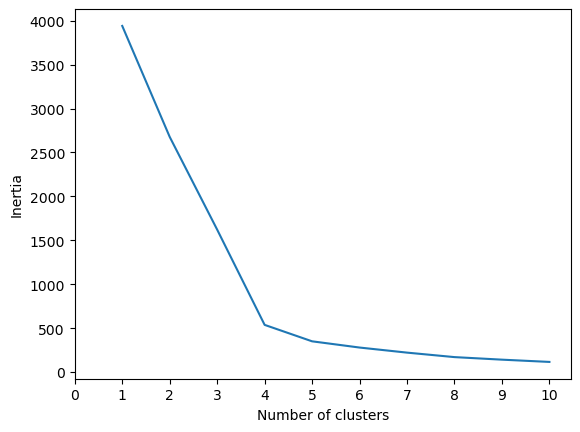

In [66]:
import matplotlib.pyplot as plt
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Running K-Means with `k=4`

In [67]:
# Predicting clusters with k=4

# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)

# Add the predicted class column to the dataframe
pcs_df["class"] = model.labels_
pcs_df.head()

,PC 1,PC 2,PC 3,class
42,-0.323731,1.123398,-0.584214,0
404,-0.306392,1.123434,-0.584718,0
1337,2.416459,1.707041,-0.663950,0
BTC,-0.139429,-1.331644,0.176676,1
ETH,-0.142360,-2.096311,0.424613,1


In [86]:
combine = [df,pcs_df]
clustered_df=pd.merge(df,pcs_df, on = df.index , how = "left")


#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df["CoinName"] = coinName_df
clustered_df



,key_0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,class,CoinName
0,42,Scrypt,PoW/PoS,4.199995e+01,42,-0.323731,1.123398,-0.584214,0,NaN
1,404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.306392,1.123434,-0.584718,0,NaN
2,1337,X13,PoW/PoS,2.927942e+10,314159265359,2.416459,1.707041,-0.663950,0,NaN
3,BTC,SHA-256,PoW,1.792718e+07,21000000,-0.139429,-1.331644,0.176676,1,NaN
4,ETH,Ethash,PoW,1.076842e+08,0,-0.142360,-2.096311,0.424613,1,NaN
...,...,...,...,...,...,...,...,...,...,...
572,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000,-0.321701,1.123265,-0.584255,0,NaN
573,BDX,CryptoNight,PoW,9.802226e+08,1400222610,0.324371,-2.312235,0.380580,1,NaN
574,ZEN,Equihash,PoW,7.296538e+06,21000000,-0.147603,-1.998434,0.226499,1,NaN
575,XBC,Scrypt,PoS,1.283270e+05,1000000,-0.278478,0.757287,-0.254989,0,NaN


In [105]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
combine = [df,pcs_df]
clustered_df=pd.merge(df,pcs_df, on = df.index , how = "left")
#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df["CoinName"] = list(coinName_df)

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
# YOUR CODE HERE

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df = clustered_df.set_index("key_0")
clustered_df.head()

(577, 10)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,class,CoinName
key_0,,,,,,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.323731,1.123398,-0.584214,0,42 Coin
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.306392,1.123434,-0.584718,0,404Coin
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.416459,1.707041,-0.663950,0,EliteCoin
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.139429,-1.331644,0.176676,1,Bitcoin
ETH,Ethash,PoW,1.076842e+08,0,-0.142360,-2.096311,0.424613,1,Ethereum


In [106]:
clustered_df.index.name = None
clustered_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,class,CoinName
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.323731,1.123398,-0.584214,0,42 Coin
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.306392,1.123434,-0.584718,0,404Coin
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.416459,1.707041,-0.663950,0,EliteCoin
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.139429,-1.331644,0.176676,1,Bitcoin
ETH,Ethash,PoW,1.076842e+08,0,-0.142360,-2.096311,0.424613,1,Ethereum


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [119]:
# Creating a 3D-Scatter with the PCA data and the clusters
import plotly.express as px
fig = px.scatter_3d(
    pcs_df,
    x="PC 3",
    y="PC 2",
    z="PC 1",
    color="class",
    symbol="class",
    width=800,

)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


In [123]:
clustered_df.columns

Index(['Algorithm', 'ProofType', 'TotalCoinsMined', 'TotalCoinSupply', 'PC 1',
       'PC 2', 'PC 3', 'class', 'CoinName'],
      dtype='object')

In [125]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(columns=["CoinName","Algorithm","ProofType", "TotalCoinSupply","TotalCoinsMined","class"], sortable=True, selectable=True)


:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,class]

In [126]:
# Print the total number of tradable cryptocurrencies.
print(clustered_df["CoinName"].count())

577


In [138]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
MinMaxScaler().fit_transform(clustered_df["TotalCoinSupply"])


ValueError: Expected 2D array, got 1D array instead:
array=[4.20000000e+01 5.32000000e+08 3.14159265e+11 2.10000000e+07
 0.00000000e+00 8.40000000e+07 2.20000000e+07 0.00000000e+00
 2.10000000e+08 2.10000000e+07 3.60057050e+09 2.10000000e+10
 2.20000000e+07 1.25000000e+07 2.10000000e+07 3.50000000e+08
 2.00000000e+07 6.40000000e+07 1.67685840e+07 0.00000000e+00
 2.00000000e+09 3.84000000e+11 1.69795588e+08 2.50000000e+08
 1.00000000e+08 0.00000000e+00 2.47000000e+08 8.40000000e+07
 4.81660000e+07 5.00000000e+05 2.10000000e+07 1.00000000e+06
 1.31400000e+07 1.80000000e+07 4.00000000e+10 4.38000000e+06
 1.65550000e+10 2.10000000e+10 1.35000000e+10 2.10000000e+07
 2.99792458e+08 3.20000000e+07 0.00000000e+00 0.00000000e+00
 1.12358130e+07 3.36000000e+08 1.42060961e+09 7.00000000e+07
 7.22457000e+07 1.20000000e+08 0.00000000e+00 9.06000000e+10
 2.20000000e+07 2.10000000e+07 2.65420800e+08 2.00000000e+07
 1.35000000e+06 1.00000000e+08 4.20000000e+07 2.00000000e+08
 0.00000000e+00 1.00000000e+07 2.41920000e+09 1.61800000e+07
 0.00000000e+00 1.50000000e+10 2.10000000e+07 3.37000000e+08
 0.00000000e+00 3.77000000e+06 4.20000000e+08 9.80000000e+07
 0.00000000e+00 2.10000000e+07 2.50000000e+08 5.12000000e+07
 0.00000000e+00 1.00000000e+03 8.88000000e+08 1.00000000e+08
 4.70119680e+07 2.30000000e+09 1.00000000e+07 4.20000000e+07
 8.00000000e+07 2.50000000e+05 0.00000000e+00 1.60000000e+09
 1.00000000e+08 2.30000000e+07 0.00000000e+00 8.40000000e+07
 2.65420800e+08 5.50000000e+06 0.00000000e+00 4.50000000e+07
 0.00000000e+00 1.00000000e+09 1.84467441e+11 1.00000000e+10
 2.15881280e+09 5.00000000e+08 1.05120000e+08 6.80000000e+07
 0.00000000e+00 1.68000000e+09 0.00000000e+00 1.66386000e+08
 1.20000000e+07 2.62800000e+06 5.00000000e+08 1.60000000e+08
 0.00000000e+00 1.00000000e+07 1.00000000e+09 1.00000000e+09
 2.00000000e+07 0.00000000e+00 0.00000000e+00 3.37133700e+06
 2.00000000e+07 1.00000000e+10 1.84000000e+09 6.19478000e+05
 2.10000000e+07 9.20000000e+10 0.00000000e+00 7.80000000e+07
 3.30000000e+07 6.57891000e+07 5.37600000e+07 5.06000000e+06
 2.10000000e+07 0.00000000e+00 2.10240000e+08 2.50000000e+08
 1.00000000e+08 1.69063970e+07 5.00000000e+07 0.00000000e+00
 1.00000000e+09 2.62980000e+07 1.60000000e+07 2.10000000e+07
 2.10000000e+07 2.10000000e+08 8.19621000e+07 2.20000000e+07
 2.65500000e+10 8.40000000e+07 1.05000000e+07 2.16262800e+10
 0.00000000e+00 4.20000000e+07 2.21052632e+08 8.40000000e+07
 3.00000000e+07 1.68351300e+08 2.40000000e+07 3.84000000e+08
 9.90000000e+10 4.00000000e+07 2.14748365e+09 2.00000000e+07
 2.00000000e+07 8.40000000e+07 2.50000000e+07 7.50000000e+07
 2.22725000e+08 5.25000000e+08 9.00000000e+07 1.39000000e+08
 6.16448000e+05 3.35000000e+07 2.00000000e+09 4.43333330e+07
 1.00000000e+08 2.00000000e+08 2.50000000e+07 6.57000000e+08
 2.00000000e+08 5.00000000e+07 9.00000000e+07 1.00000000e+07
 2.10000000e+07 9.73600000e+06 3.00000000e+06 2.10000000e+07
 1.20000000e+09 0.00000000e+00 2.00000000e+08 0.00000000e+00
 1.06382980e+07 3.10000000e+09 3.00000000e+07 2.00000000e+10
 7.40000000e+07 0.00000000e+00 1.50000000e+09 2.14000000e+07
 3.99998980e+07 2.50012400e+06 1.00000000e+08 3.01000000e+08
 7.50600000e+09 2.62055390e+07 2.10000000e+07 1.25000000e+08
 3.00000000e+07 1.00000000e+10 5.00000000e+08 8.50000000e+08
 3.85332678e+06 5.00000000e+07 3.85400000e+07 4.20000000e+07
 2.28000000e+08 2.00000000e+07 6.00000000e+07 2.00000000e+07
 3.30000000e+07 7.65000000e+07 2.80000000e+07 6.50659833e+08
 5.00000000e+06 2.10000000e+07 1.44000000e+08 3.25149169e+10
 1.30000000e+07 3.31578900e+06 1.50000000e+07 7.88352000e+07
 2.71428600e+06 2.50000000e+07 9.99999900e+06 5.00000000e+08
 2.10000000e+07 9.35400000e+06 2.00000000e+07 1.00000000e+11
 2.19333330e+07 1.85000000e+08 5.50000000e+07 1.10000000e+08
 3.36000000e+06 1.45248515e+07 1.00000000e+09 1.70000000e+07
 1.00000000e+09 1.00000000e+08 2.10000000e+07 3.44264230e+07
 2.23290100e+06 1.00000000e+08 3.69000000e+07 1.10000000e+08
 4.00000000e+09 1.10290030e+08 1.00000000e+08 4.82520000e+07
 4.00000000e+08 5.00000000e+08 2.12121210e+07 2.86000000e+07
 1.00000000e+09 7.50000000e+10 4.00000000e+07 3.55204000e+07
 2.00000000e+09 2.50000000e+09 3.00000000e+07 1.05000000e+08
 9.00000000e+10 2.00084200e+08 7.20000000e+07 1.00000000e+08
 1.05000000e+08 5.00000000e+10 0.00000000e+00 3.40282367e+08
 3.00000000e+07 2.00000000e+09 1.00000000e+07 1.00000000e+08
 1.20000000e+08 1.00000000e+08 1.92768000e+07 3.00000000e+07
 7.50000000e+07 6.00000000e+07 1.89000000e+07 5.00000000e+10
 5.40000000e+07 1.88981876e+07 2.10000000e+07 2.00000000e+11
 5.00000000e+09 1.37500000e+08 1.10000000e+09 1.00000000e+08
 2.10000000e+07 9.50727100e+06 1.74058912e+07 8.67126345e+10
 1.05000000e+10 6.15999650e+07 0.00000000e+00 2.00000000e+07
 8.40000000e+07 1.00000000e+08 1.00000000e+08 4.82520000e+07
 4.20000000e+06 8.88888880e+07 9.13889460e+07 4.50000000e+10
 2.70000000e+07 2.10000000e+10 4.00000000e+08 1.80000000e+09
 1.57333330e+07 2.70000000e+07 2.40000000e+07 2.10000000e+07
 2.50000000e+10 1.00000000e+08 1.20000000e+09 6.00000000e+07
 1.56306733e+08 2.10000000e+07 2.00000000e+08 1.00000000e+08
 2.10000000e+07 1.47882760e+07 9.00000000e+09 3.50000000e+08
 4.50000000e+07 2.80000000e+08 3.18000000e+07 5.78793000e+07
 1.44000000e+08 5.00000000e+08 3.00000000e+10 2.10000000e+08
 6.60000000e+08 2.10000000e+08 8.50000000e+10 1.25000000e+07
 1.00000000e+10 2.77161210e+07 1.00000000e+08 2.00000000e+07
 5.50000000e+08 9.99481516e+08 5.00000000e+10 1.50000000e+08
 5.00000000e+09 5.00000000e+07 9.00000000e+10 1.98000000e+07
 5.00000000e+07 7.00000000e+07 2.10000000e+07 3.20000000e+07
 1.20000000e+08 5.00000000e+08 6.40000000e+07 9.00000000e+08
 4.00000000e+06 2.10000000e+07 2.50000000e+10 2.30000000e+07
 2.01660000e+07 2.30000000e+07 2.50000000e+07 1.61803300e+06
 2.40000000e+07 3.00000000e+07 1.00000000e+12 1.66000000e+07
 2.32000000e+08 3.36000000e+08 3.98000000e+09 1.00000000e+10
 2.50000000e+07 1.00000000e+08 1.10000000e+09 8.00000000e+08
 5.20000000e+09 8.40000000e+08 4.00000000e+07 1.84069798e+10
 7.20000000e+07 2.50000000e+07 6.90000000e+07 5.00000000e+08
 1.93405940e+07 2.52460800e+08 2.50000000e+07 6.00000000e+07
 1.24000000e+08 1.00000000e+09 6.50000000e+09 1.00000000e+09
 2.10000000e+07 1.00446551e+10 2.50000000e+07 3.20000000e+07
 1.18920000e+07 5.00000000e+07 3.00000000e+06 5.00000000e+06
 7.00000000e+07 5.00000000e+08 3.00000000e+08 2.10000000e+07
 8.80000000e+07 3.00000000e+07 2.10000000e+07 1.00000000e+08
 1.00000000e+08 2.00000000e+08 8.00000000e+07 1.84000000e+07
 4.50000000e+07 5.12195122e+09 2.10000000e+07 2.62800000e+07
 2.10000000e+07 1.80000000e+07 2.60000000e+07 1.05000000e+07
 3.00000000e+07 1.10000000e+08 6.00000518e+08 8.14813900e+06
 7.50000000e+06 1.50000000e+08 1.84000000e+11 1.00000000e+08
 1.02000000e+10 6.20000000e+07 4.40000000e+07 1.68000000e+08
 1.00000000e+08 1.00000000e+09 8.40000000e+07 9.00000000e+07
 9.20000000e+10 6.50000000e+08 2.50000000e+08 5.45399000e+08
 1.00262205e+08 1.80818060e+07 2.20757000e+07 2.10000000e+07
 2.10000000e+07 1.56000000e+07 8.25465640e+07 2.10000000e+07
 5.15100000e+06 1.68800000e+10 5.25000000e+07 1.00000000e+08
 2.21052630e+07 1.00000000e+09 1.00000000e+09 1.75000000e+09
 8.81888880e+07 2.10000000e+08 1.84470000e+11 1.00000000e+09
 5.50000000e+07 5.00000000e+07 5.00000000e+07 2.60000000e+08
 2.10000000e+08 2.10000000e+09 3.66000000e+08 1.00000000e+08
 2.50000000e+07 3.65000000e+07 1.80000000e+10 2.10000000e+07
 1.00000000e+09 1.00000000e+08 1.00000000e+09 7.60000000e+09
 5.00000000e+07 2.07000000e+08 8.40000000e+07 2.00000000e+08
 2.10000000e+07 3.80000000e+07 6.40000000e+07 7.00000000e+10
 0.00000000e+00 8.08000000e+09 5.40000000e+07 2.10000000e+07
 1.05120001e+08 2.52288000e+07 7.00000000e+09 1.05000000e+08
 2.10000000e+07 1.20000000e+08 2.10000000e+07 2.62800000e+08
 1.90359990e+07 3.08860000e+07 1.33700000e+07 7.48000000e+10
 3.27000000e+07 1.00000000e+08 1.97000000e+07 8.40000000e+07
 5.00000000e+08 5.00000000e+09 4.20000000e+08 6.40000000e+07
 2.10000000e+06 1.68000000e+08 3.00000000e+07 1.00000000e+09
 1.00000000e+10 3.50000000e+10 9.81000000e+10 0.00000000e+00
 4.00000000e+09 2.00000000e+08 7.00000000e+09 5.42561190e+07
 2.10000000e+07 0.00000000e+00 5.00000000e+08 1.00000000e+09
 1.05000000e+10 1.90000000e+08 1.00000000e+09 4.20000000e+07
 1.50000000e+07 5.00000000e+10 4.00000000e+08 1.05000000e+08
 2.08000000e+08 1.60000000e+08 9.00000000e+06 5.00000000e+06
 1.82000000e+08 1.65043330e+07 1.05000000e+08 1.59918400e+08
 1.00088356e+10 3.00000000e+08 6.01681450e+07 2.80000000e+06
 1.20000000e+05 2.10000000e+09 2.10000000e+08 2.10000000e+07
 0.00000000e+00 2.44879440e+07 0.00000000e+00 1.00000000e+09
 1.00000000e+11 1.00000000e+08 8.63414000e+06 9.00000000e+08
 9.90000000e+11 1.10000000e+07 1.00000000e+09 2.00000000e+09
 2.50000000e+08 1.40022261e+09 2.10000000e+07 1.00000000e+06
 1.00000000e+08].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [21]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
# YOUR CODE HERE

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
# YOUR CODE HERE

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
# YOUR CODE HERE

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,1
ETH,0.000000e+00,0.000109,Ethereum,1
LTC,8.400000e-05,0.000064,Litecoin,1
DASH,2.200000e-05,0.000009,Dash,0
XMR,0.000000e+00,0.000017,Monero,1
ETC,2.100000e-04,0.000115,Ethereum Classic,1
ZEC,2.100000e-05,0.000007,ZCash,1


In [22]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
# YOUR CODE HERE


:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)